In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('../input/ventilator-pressure-prediction/train.csv')
train_df.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [3]:
train_df.shape

(6036000, 8)

In [4]:
train_df.describe()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
count,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06
mean,3.018000e+06,6.283886e+04,2.703618e+01,2.608072e+01,1.307225e+00,7.321615e+00,6.204493e-01,1.122041e+01
std,1.742443e+06,3.633526e+04,1.959549e+01,1.715231e+01,7.659778e-01,1.343470e+01,4.852752e-01,8.109703e+00
min,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.895744e+00
25%,1.509001e+06,3.137700e+04,5.000000e+00,1.000000e+01,6.428995e-01,3.936623e-01,0.000000e+00,6.329607e+00
50%,3.018000e+06,6.276550e+04,2.000000e+01,2.000000e+01,1.308123e+00,4.386146e+00,1.000000e+00,7.032628e+00
75%,4.527000e+06,9.430100e+04,5.000000e+01,5.000000e+01,1.965502e+00,4.983895e+00,1.000000e+00,1.364103e+01
max,6.036000e+06,1.257490e+05,5.000000e+01,5.000000e+01,2.937238e+00,1.000000e+02,1.000000e+00,6.482099e+01


In [5]:
test_df = pd.read_csv('../input/ventilator-pressure-prediction/test.csv')
test_df.head()

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0


In [6]:
test_df.shape

(4024000, 7)

In [7]:
test_df.describe()

,id,breath_id,R,C,time_step,u_in,u_out
count,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06
mean,2.012000e+06,6.292796e+04,2.710785e+01,2.607038e+01,1.307083e+00,7.338098e+00,6.203864e-01
std,1.161629e+06,3.624924e+04,1.954281e+01,1.717103e+01,7.658902e-01,1.350955e+01,4.852908e-01
min,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.006001e+06,3.153050e+04,5.000000e+00,1.000000e+01,6.428454e-01,4.096735e-01,0.000000e+00
50%,2.012000e+06,6.305750e+04,2.000000e+01,2.000000e+01,1.308083e+00,4.377512e+00,1.000000e+00
75%,3.018000e+06,9.433325e+04,5.000000e+01,5.000000e+01,1.965240e+00,4.983472e+00,1.000000e+00
max,4.024000e+06,1.257480e+05,5.000000e+01,5.000000e+01,2.935203e+00,1.000000e+02,1.000000e+00


In [8]:
tr_br_id = train_df.breath_id.unique()
ts_br_id = test_df.breath_id.unique()

common_br_id = []

for el in ts_br_id:
  if el in tr_br_id:
    common_br_id.append(el)
print(f"Common ids on train and test data : {len(common_br_id)}")

Common ids on train and test data : 0


In [9]:
train_df.drop_duplicates(['breath_id', 'time_step'], inplace = True)

In [10]:
train_df.drop('breath_id', 1, inplace = True)
test_df.drop('breath_id', 1, inplace = True)

In [11]:
train_df.isnull().sum()

id           0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64

In [12]:
test_df.isnull().sum()

id           0
R            0
C            0
time_step    0
u_in         0
u_out        0
dtype: int64

In [13]:
train_df.dtypes

id             int64
R              int64
C              int64
time_step    float64
u_in         float64
u_out          int64
pressure     float64
dtype: object

In [14]:
train_df.sort_values(by=['time_step'], inplace = True)
train_df.head()

,id,R,C,time_step,u_in,u_out,pressure
0,1,20,50,0.0,0.083334,0,5.837492
4049920,4049921,50,20,0.0,1.196597,0,6.118700
4050000,4050001,20,10,0.0,3.138084,0,5.415679
4050080,4050081,50,10,0.0,1.593019,0,3.798729
369120,369121,50,50,0.0,0.000000,0,6.681117


In [15]:
test_id = test_df.id

In [16]:
train_df.drop('id', 1, inplace = True)
test_df.drop('id', 1, inplace = True)

In [17]:
train_df.head()

,R,C,time_step,u_in,u_out,pressure
0,20,50,0.0,0.083334,0,5.837492
4049920,50,20,0.0,1.196597,0,6.118700
4050000,20,10,0.0,3.138084,0,5.415679
4050080,50,10,0.0,1.593019,0,3.798729
369120,50,50,0.0,0.000000,0,6.681117


In [18]:
train_df['R3C'] = train_df.R**3*train_df.C
test_df['R3C'] = test_df.R**3*test_df.C

In [19]:
train_df.head()

,R,C,time_step,u_in,u_out,pressure,R3C
0,20,50,0.0,0.083334,0,5.837492,400000
4049920,50,20,0.0,1.196597,0,6.118700,2500000
4050000,20,10,0.0,3.138084,0,5.415679,80000
4050080,50,10,0.0,1.593019,0,3.798729,1250000
369120,50,50,0.0,0.000000,0,6.681117,6250000


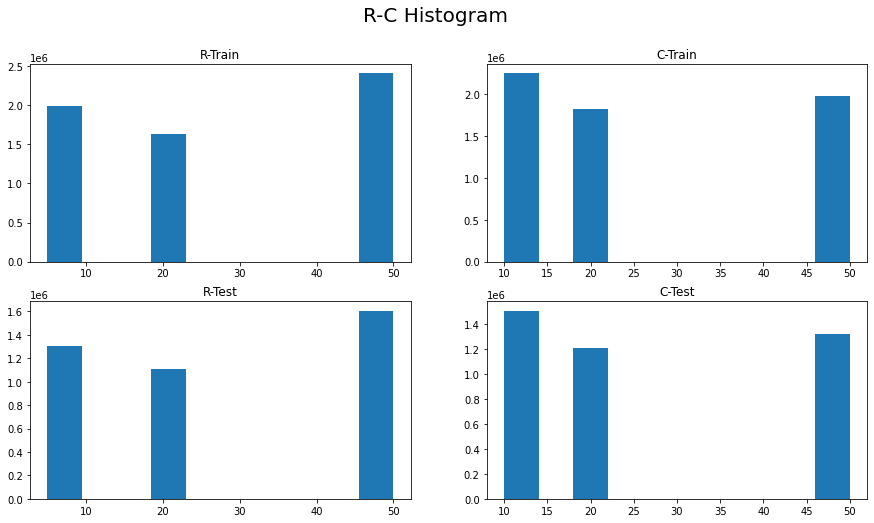

In [20]:
ax, fig = plt.subplots(2, 2, figsize = (15, 8))
plt.suptitle('R-C Histogram', size = 20)
plt.subplot(2, 2, 1)
plt.hist(train_df.R)
plt.title('R-Train')
plt.subplot(2, 2, 2)
plt.hist(train_df.C)
plt.title('C-Train')
plt.subplot(2, 2, 3)
plt.hist(test_df.R)
plt.title('R-Test')
plt.subplot(2, 2, 4)
plt.hist(test_df.C)
plt.title('C-Test')
plt.show()

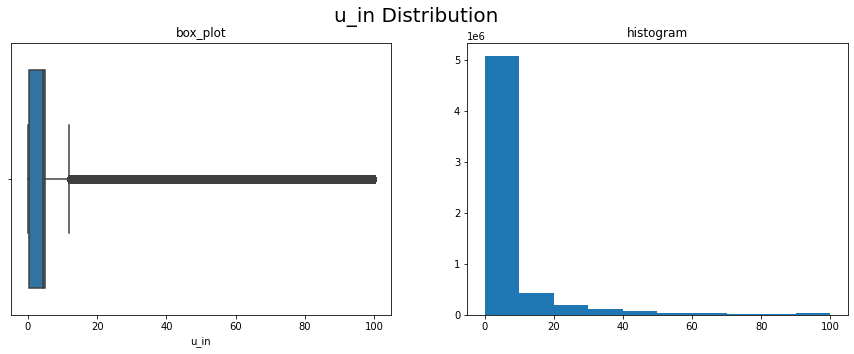

In [21]:
ax, fig = plt.subplots(1, 1, figsize = (15, 5))
plt.suptitle('u_in Distribution', size = 20)
plt.subplot(1, 2, 1)
sns.boxplot(train_df.u_in)
plt.title('box_plot')
plt.subplot(1, 2, 2)
plt.hist(train_df.u_in)
plt.title('histogram')
plt.show()

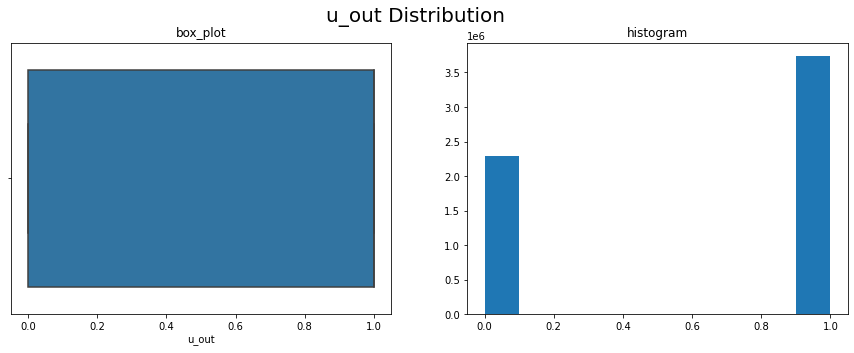

In [22]:
ax, fig = plt.subplots(1, 1, figsize = (15, 5))
plt.suptitle('u_out Distribution', size = 20)
plt.subplot(1, 2, 1)
sns.boxplot(train_df.u_out)
plt.title('box_plot')
plt.subplot(1, 2, 2)
plt.hist(train_df.u_out)
plt.title('histogram')
plt.show()

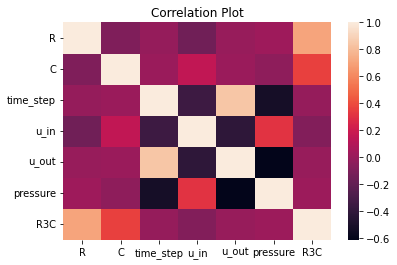

In [23]:
corr_data = train_df.corr()
sns.heatmap(corr_data)
plt.title('Correlation Plot')
plt.show()

In [24]:
train_df.drop(['R', 'C', 'R3C'], 1, inplace = True)
test_df.drop(['R', 'C', 'R3C'], 1, inplace = True)

In [25]:
train_df.head()

,time_step,u_in,u_out,pressure
0,0.0,0.083334,0,5.837492
4049920,0.0,1.196597,0,6.118700
4050000,0.0,3.138084,0,5.415679
4050080,0.0,1.593019,0,3.798729
369120,0.0,0.000000,0,6.681117


In [26]:
test_df.head()

,time_step,u_in,u_out
0,0.000000,0.000000,0
1,0.031904,7.515046,0
2,0.063827,14.651675,0
3,0.095751,21.230610,0
4,0.127644,26.320956,0


In [27]:
for col in ['time_step', 'u_in', 'u_out']:
  print(f"[Train data][{col}] | Minimum Value : {min(train_df[col])} | Maximum Value : {max(train_df[col])}")
  print(f"[Test data][{col}] | Minimum Value : {min(test_df[col])} | Maximum Value : {max(test_df[col])}")

[Train data][time_step] | Minimum Value : 0.0 | Maximum Value : 2.9372379779815674
[Test data][time_step] | Minimum Value : 0.0 | Maximum Value : 2.9352025985717773
[Train data][u_in] | Minimum Value : 0.0 | Maximum Value : 100.0
[Test data][u_in] | Minimum Value : 0.0 | Maximum Value : 100.0
[Train data][u_out] | Minimum Value : 0 | Maximum Value : 1
[Test data][u_out] | Minimum Value : 0 | Maximum Value : 1


In [28]:
def minmaxscaler(train_data, test_data):
  min_val = min(train_data)
  max_val = max(train_data)
  return (train_data - min_val) / (max_val - min_val) , (test_data - min_val) / (max_val - min_val)

for col in ['time_step', 'u_in', 'u_out']:
  train_df[col], test_df[col] = minmaxscaler(train_df[col], test_df[col])

In [29]:
train_df.head()

,time_step,u_in,u_out,pressure
0,0.0,0.000833,0.0,5.837492
4049920,0.0,0.011966,0.0,6.118700
4050000,0.0,0.031381,0.0,5.415679
4050080,0.0,0.015930,0.0,3.798729
369120,0.0,0.000000,0.0,6.681117


In [30]:
test_df.head()

,time_step,u_in,u_out
0,0.000000,0.000000,0.0
1,0.010862,0.075150,0.0
2,0.021730,0.146517,0.0
3,0.032599,0.212306,0.0
4,0.043457,0.263210,0.0


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X, y = train_df.drop('pressure', 1) , train_df.pressure

In [33]:
train_df, val_df = train_test_split(train_df, test_size = 0.2, shuffle = True, random_state = 42)
train_df.shape, val_df.shape

((4828800, 4), (1207200, 4))

In [34]:
test_df.shape

(4024000, 3)

In [35]:
type(train_df.iloc[0,-1:][0])

numpy.float64

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset


class ANN_model(nn.Module):
  
  def __init__(self):
    super(ANN_model, self).__init__()
    self.dense1 = nn.Linear(3, 1024)
    self.dense2 = nn.Linear(1024, 2048)
    self.op = nn.Linear(2048, 1)

    self.model = nn.Sequential(
        self.dense1,
        self.dense2,
        self.op
    )
  def forward(self, x):
    return self.model(x)


rand_data = torch.rand(5,3)
model = ANN_model()
print(f"Output Shape : {model(rand_data).shape}")

Output Shape : torch.Size([5, 1])


In [37]:
class ANN_dataset(Dataset):
  def __init__(self, dataset, test_data = False):
    self.dataset = dataset
    self.test_data = test_data

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, index):
    X = torch.tensor(self.dataset.iloc[index, :3])
    if self.test_data != True:
      y = torch.tensor(self.dataset.iloc[index, -1:][0])
      return (X, y)
    return X

In [38]:
train_ds = ANN_dataset(train_df)
val_ds = ANN_dataset(val_df)
test_ds = ANN_dataset(test_df,True)

In [39]:
train_dl = DataLoader(train_ds, batch_size = 100, shuffle = True)
val_dl = DataLoader(val_ds, batch_size = 100, shuffle = True)
test_dl = DataLoader(test_ds, batch_size = 100, shuffle = False)

In [40]:
for X, y in train_dl:
  print(X.shape, y.shape)
  break
for X, y in val_dl:
  print(X.shape, y.shape)
  break
for X in test_dl:
  print(X.shape)
  break

torch.Size([100, 3]) torch.Size([100])
torch.Size([100, 3]) torch.Size([100])
torch.Size([100, 3])


In [41]:
# Chossing training hyperparameters and also the optimizer and loss

EPOCHS = 10
criterion = nn.MSELoss()
optim = torch.optim.Adam(params = model.parameters(), lr = 1e-4)

In [42]:
from termcolor import cprint

In [43]:
model = model.cuda()  # Putting the model inside GPU

In [44]:
for name,param in model.named_parameters():
  print(name, param.dtype)

dense1.weight torch.float32
dense1.bias torch.float32
dense2.weight torch.float32
dense2.bias torch.float32
op.weight torch.float32
op.bias torch.float32


In [45]:
# Model Training...
train_loss = []
val_loss = []
best_loss = np.inf
for epoch in range(EPOCHS):
    print(f"Epoch {epoch + 1} : \n")
    TR_LOSS = 0.0
    VAL_LOSS = 0.0
    model.train()
    
    # Train Data Forward & Backward Pass
    
    for index, (train_patch, labels) in enumerate(train_dl):
        optim.zero_grad()
        train_patch = train_patch.float().cuda()
        labels = labels.float().cuda()
        op = model(train_patch)
        tloss = criterion(op, labels)
        TR_LOSS += tloss.item()
        train_loss.append(tloss.item())
        tloss.backward()
        optim.step()
        
        if index % 1000 == 999:
            print(f"         Step {index + 1} Loss : {'%.4f'%(tloss.item())}") 
        if index == 9999:
            break
    model.eval()
    # Validation Checking ( Only Forward Pass )
    
    with torch.no_grad():
        for index, (val_patch, labels) in enumerate(val_dl):
            val_patch = val_patch.float().cuda()
            labels = labels.float().cuda()
            op = model(val_patch)
            vloss = criterion(op, labels)
            VAL_LOSS += vloss.item()
            val_loss.append(vloss.item())
            if index == 2999:
                break
                
    print(f"\n     Training Loss : {'%.4f'%(TR_LOSS)}  ||  Validation Loss : {'%.4f'%(VAL_LOSS)}\n")
    
    if VAL_LOSS < best_loss :      # Model Updationg
        cprint("Model Updation : Success!\n", 'green')
        torch.save(model, 'best_model.pth')
        best_loss = VAL_LOSS
    else:
        cprint("Model Updation : Failed!\n", 'red')
cprint('Training completed...', 'blue')

Epoch 1 : 

         Step 1000 Loss : 75.7310
         Step 2000 Loss : 74.1362
         Step 3000 Loss : 79.4445
         Step 4000 Loss : 54.8990
         Step 5000 Loss : 72.0923
         Step 6000 Loss : 55.8138
         Step 7000 Loss : 97.9195
         Step 8000 Loss : 91.8779
         Step 9000 Loss : 63.3466
         Step 10000 Loss : 54.5072

     Training Loss : 658638.6016  ||  Validation Loss : 197113.5693

Model Updation : Success!

Epoch 2 : 

         Step 1000 Loss : 59.6065
         Step 2000 Loss : 73.0027
         Step 3000 Loss : 61.2401
         Step 4000 Loss : 51.2494
         Step 5000 Loss : 53.9379
         Step 6000 Loss : 60.0813
         Step 7000 Loss : 58.0830
         Step 8000 Loss : 54.5828
         Step 9000 Loss : 66.7418
         Step 10000 Loss : 55.6255

     Training Loss : 660174.6809  ||  Validation Loss : 196709.6102

Model Updation : Success!

Epoch 3 : 

         Step 1000 Loss : 82.2555
         Step 2000 Loss : 72.7770
         Step 3000 L

In [46]:
best_model = torch.load('best_model.pth')
best_model

ANN_model(
  (dense1): Linear(in_features=3, out_features=1024, bias=True)
  (dense2): Linear(in_features=1024, out_features=2048, bias=True)
  (op): Linear(in_features=2048, out_features=1, bias=True)
  (model): Sequential(
    (0): Linear(in_features=3, out_features=1024, bias=True)
    (1): Linear(in_features=1024, out_features=2048, bias=True)
    (2): Linear(in_features=2048, out_features=1, bias=True)
  )
)

In [47]:
pred = []
with torch.no_grad():
    for index, test_patch in enumerate(test_dl):
        test_patch = test_patch.float().cuda()
        op = best_model(val_patch).cpu().detach().numpy().tolist()
        if index % 1000 == 999:
            print(f"Predicted {index + 1}th patch...")
        for el in op:
            pred.append(el)
print('Prediction data prepared...')

Predicted 1000th patch...
Predicted 2000th patch...
Predicted 3000th patch...
Predicted 4000th patch...
Predicted 5000th patch...
Predicted 6000th patch...
Predicted 7000th patch...
Predicted 8000th patch...
Predicted 9000th patch...
Predicted 10000th patch...
Predicted 11000th patch...
Predicted 12000th patch...
Predicted 13000th patch...
Predicted 14000th patch...
Predicted 15000th patch...
Predicted 16000th patch...
Predicted 17000th patch...
Predicted 18000th patch...
Predicted 19000th patch...
Predicted 20000th patch...
Predicted 21000th patch...
Predicted 22000th patch...
Predicted 23000th patch...
Predicted 24000th patch...
Predicted 25000th patch...
Predicted 26000th patch...
Predicted 27000th patch...
Predicted 28000th patch...
Predicted 29000th patch...
Predicted 30000th patch...
Predicted 31000th patch...
Predicted 32000th patch...
Predicted 33000th patch...
Predicted 34000th patch...
Predicted 35000th patch...
Predicted 36000th patch...
Predicted 37000th patch...
Predicted 

In [48]:
test_id = test_id.tolist()

In [49]:
prediction_dataframe = pd.DataFrame({'id': test_id,'pressure':pred})
prediction_dataframe.head()

,id,pressure
0,1,[11.597485542297363]
1,2,[11.63545036315918]
2,3,[11.63787841796875]
3,4,[11.638035774230957]
4,5,[11.60467529296875]


In [50]:
prediction_dataframe['pressure'] = prediction_dataframe['pressure'].apply(lambda x: x[0])

In [51]:
prediction_dataframe.head()

,id,pressure
0,1,11.597486
1,2,11.635450
2,3,11.637878
3,4,11.638036
4,5,11.604675


In [52]:
prediction_dataframe.to_csv('submission.csv', index = False)